In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/ner.csv')

In [4]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


Exploratory Analysis

In [5]:
df.describe()

,Sentence #,Sentence,POS,Tag
count,47959,47959,47959,47959
unique,47959,47575,47214,33318
top,Sentence: 1,VOA 's Mil Arcega reports .,"['NNP', 'POS', 'NNP', 'NNP', 'VBZ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
freq,1,17,39,450


In [6]:
df.tail(2)

,Sentence #,Sentence,POS,Tag
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47958,Sentence: 47959,Indian forces said they responded to the attack,"['JJ', 'NNS', 'VBD', 'PRP', 'VBD', 'TO', 'DT',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [8]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [9]:
maxlen = max(len(s) for s in df['Sentence'])
print(maxlen)

541


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

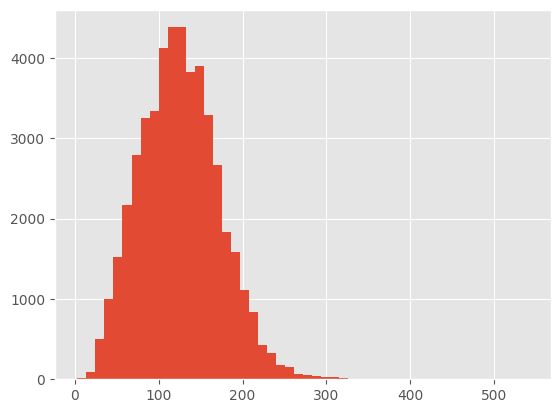

In [11]:
plt.hist([len(s) for s in df['Sentence']], bins=50)
plt.show()

Data Preprocessing

def getwords(s):
    return s.split()

In [12]:
def getwords(s):
   return s.split()

In [13]:
def gettags(s):
   return s[2:-2].split("', '")

In [14]:
def sentence2idx(s):
  s = [word2idx[w] for w in getwords(s)]
  return s

In [15]:
def tags_list2idx(t):
  t = [tag2idx[tag] for tag in gettags(t)]
  return t

In [16]:
words_list=[getwords(s) for s in df['Sentence']]
len(words_list)
print(words_list[:4])

[['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.'], ['Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"'], ['They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.'], ['Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.']]


In [17]:
flatten_list = [j for sub in words_list for j in sub]
print(flatten_list[:100])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.', 'Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"', 'They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.', 'Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.', 'The', 'protest', 'comes', 'on', 'the', 'eve', 'of', 'the', 'annual', 'conference', 'of', 'Britain', "'s", 'ruling', 'Labor', 'Party', 'in']


In [18]:
words_set = set(tuple(flatten_list))
words = list(words_set)
len(words)
print(words[:10])

['lucky', 'Mountains', 'long-standing', '37.5', 'hoped', 'Mahara', 'six-to-11-year-old', 'escalate', 'Bakri', 'simmering']


In [19]:
tags_list=[gettags(s) for s in df['Tag']]
print(len(tags_list))
print(tags_list[:4])

47959
[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


In [20]:
flatten_tags = [j for sub in tags_list for j in sub]
tags_set = set(tuple(flatten_tags))
tags = list(tags_set)
print(tags[0:20])
print(len(tags))

['B-geo', 'I-eve', 'I-gpe', 'B-gpe', 'B-tim', 'B-per', 'B-org', 'B-art', 'I-per', 'I-org', 'B-nat', 'B-eve', 'I-geo', 'I-nat', 'I-tim', 'I-art', 'O']
17


In [21]:
# No of unique words and tags in the dataset
n_words = len(words)
n_tags = len(tags)
print(n_words)
print(n_tags)

35176
17


In [22]:
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [23]:
print(word2idx['a'])
print(tag2idx['B-eve'])

29401
11


In [24]:
from keras.preprocessing.sequence import pad_sequences
X = [sentence2idx(s) for s in df['Sentence']]
print(X[:2])

[[12485, 26814, 1577, 19270, 17690, 17501, 11341, 20726, 27367, 4750, 25715, 17689, 16728, 17747, 4392, 4750, 14103, 26814, 1685, 22303, 13744, 28122, 27282, 26943], [30035, 26814, 28083, 939, 17689, 4750, 15779, 24428, 4750, 18915, 17072, 28370, 30091, 23075, 24150, 30577, 30285, 3383, 24117, 21281, 22321, 21116, 3383, 17747, 3383, 29393, 4750, 31080, 26943, 3383]]


In [25]:
Y = [tags_list2idx(t) for t in df['Tag']]
print(Y[:2])


[[16, 16, 16, 16, 16, 16, 0, 16, 16, 16, 16, 16, 0, 16, 16, 16, 16, 16, 3, 16, 16, 16, 16, 16], [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 5, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]]


In [26]:
type(tags_list)

list

In [27]:
from collections import Counter

In [28]:
from wordcloud import WordCloud

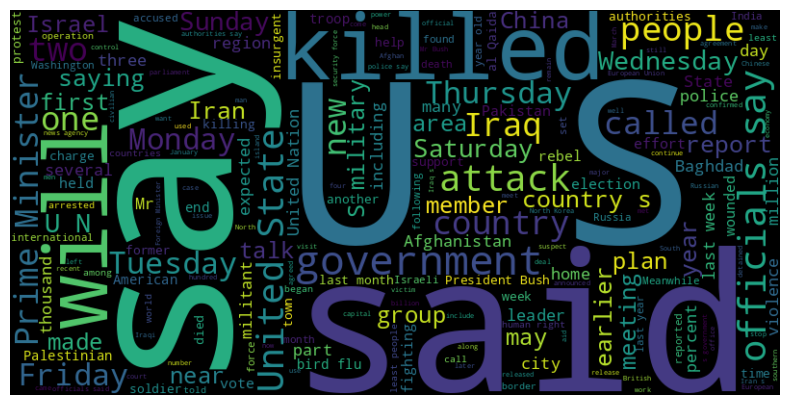

In [29]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(''.join(df['Sentence']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
from itertools import chain
def make_dict_map(data, tokentag):
    token_to_idx = {}
    idx_to_token = {}
    if tokentag == 'token':
        voc = list(set(data['Sentence'].to_list()))
    else:
        voc = list(set(data['Tag'].to_list()))
    idx_to_token = {idx:tok for  idx, tok in enumerate(voc)}
    token_to_idx = {tok:idx for  idx, tok in enumerate(voc)}
    return token_to_idx , idx_to_token

In [31]:
token_to_idx, idx_to_token = make_dict_map(df, 'token')
tag_to_idx, idx_to_tag = make_dict_map(df, 'tag')
df['Word_idx'] = df['Sentence'].map(token_to_idx)
df['Tag_idx'] = df['Tag'].map(tag_to_idx)
df_fillna = df.fillna(method='ffill', axis=0)

In [32]:
df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

<ipython-input-32-311895c55698>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))


In [33]:
df_fillna

,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...",43398,11423
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",36332,2952
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",37052,16532
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",37592,20193
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",7058,6115
...,...,...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe...",44342,28734
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...",9209,4704
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",2471,7897
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",24085,7897


Feature Selection and Extraction

In [34]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import ast

In [35]:
def preprocess_data(df):
    for i in range(len(df)):
        pos = ast.literal_eval(df['POS'][i])
        tags = ast.literal_eval(df['Tag'][i])
        df['POS'][i] = [str(word) for word in pos]
        df['Tag'][i] = [str(word.upper()) for word in tags]
    return df

In [36]:
df1 = preprocess_data(df)
df1.head()

<ipython-input-35-5dfb911fd570>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'][i] = [str(word) for word in pos]
<ipython-input-35-5dfb911fd570>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tag'][i] = [str(word.upper()) for word in tags]


,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO...",43398,11423
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",36332,2952
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO...",37052,16532
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",37592,20193
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,...",7058,6115


In [37]:
df_final = df[['Sentence','Tag']]

df_train,df_test = train_test_split(df_final,test_size=0.2,random_state=42)
len(df_train),len(df_test)

(38367, 9592)

In [38]:
train_targets = list(df_train.Tag.values)
test_targets = list(df_test.Tag.values)

tokenizer = Tokenizer(lower=False,oov_token="UNK")
tokenizer.fit_on_texts(df_train['Sentence'])

train_inputs = tokenizer.texts_to_sequences(df_train['Sentence'])
test_inputs = tokenizer.texts_to_sequences(df_test['Sentence'])

In [39]:
word2idx = tokenizer.word_index
V = len(word2idx) # Vocab size
print("Found %s unique tokens "%V)

Found 28761 unique tokens 


In [40]:
train_tags = set([val for sublist in train_targets for val in sublist])
test_tags = set([val for sublist in test_targets for val in sublist])

print("Unique NER tags in train set: ",train_tags)
print("Unique NER tags in test set: ",test_tags)

Unique NER tags in train set:  {'I-ART', 'B-NAT', 'I-EVE', 'I-GEO', 'B-ORG', 'I-GPE', 'B-TIM', 'B-ART', 'I-PER', 'B-EVE', 'B-GEO', 'I-TIM', 'I-NAT', 'B-PER', 'B-GPE', 'I-ORG', 'O'}
Unique NER tags in test set:  {'I-ART', 'B-NAT', 'I-EVE', 'I-GEO', 'B-ORG', 'I-GPE', 'B-TIM', 'B-ART', 'I-PER', 'B-EVE', 'B-GEO', 'I-TIM', 'I-NAT', 'B-PER', 'B-GPE', 'I-ORG', 'O'}


In [41]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_tgt_int = tag_tokenizer.texts_to_sequences(train_targets)
test_tgt_int = tag_tokenizer.texts_to_sequences(test_targets)

In [42]:
# Max length
max_length_train = max(len(sent) for sent in train_inputs)
max_length_test = max(len(sent) for sent in test_inputs)
max_length = max(max_length_train,max_length_test)

# Pad input sequences
train_inputs_final = pad_sequences(train_inputs,maxlen=max_length,padding="post")
print("Shape of train inputs: ",train_inputs_final.shape)

test_inputs_final = pad_sequences(test_inputs,maxlen=max_length,padding="post")
print("Shape of test inputs: ",test_inputs_final.shape)

train_targets_final = pad_sequences(train_tgt_int,maxlen=max_length,padding="post")
print("Shape of train targets: ",train_targets_final.shape)

test_targets_final = pad_sequences(test_tgt_int,maxlen=max_length,padding="post")
print("Shape of test targets: ",test_targets_final.shape)

Shape of train inputs:  (38367, 89)
Shape of test inputs:  (9592, 89)
Shape of train targets:  (38367, 89)
Shape of test targets:  (9592, 89)


In [43]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
# Preprocess the text column (e.g., remove punctuation, lowercase)
# Assuming your text column is named 'text'
df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()

<ipython-input-44-3fbdc4ed2a65>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()


In [45]:
 from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [47]:
# Tokenization
df1['tokens'] = df1['Sentence'].apply(word_tokenize)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

In [49]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df1['Sentence'])


In [50]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df1['Sentence'], df1['Tag'], test_size=0.2, random_state=42)

In [51]:
# Fit and transform the text data
word_counts = count_vectorizer.fit_transform(df1['Sentence'])

In [52]:
# Get the top 15 most frequent words
word_freq = word_counts.sum(axis=0)
word_freq_sorted = sorted(zip(word_freq.tolist()[0], count_vectorizer.get_feature_names_out()), reverse=True)[:15]

In [53]:
feature_names = count_vectorizer.get_feature_names_out()

In [54]:
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_freq.tolist()[0]})

In [55]:
top_15_words = word_freq_df.sort_values(by='count', ascending=False).head(15)
top_15_words

,word,count
24457,said,5329
24717,says,4640
24711,say,4178
21922,president,3396
20042,officials,3390
12558,government,3112
18840,mr,3086
15963,killed,2861
21058,people,2756
19446,new,2151


In [56]:
# Stopword removal
stop_words = set(stopwords.words('english'))
df1['tokens'] = df1['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [57]:
feature_names = count_vectorizer.get_feature_names_out()

In [58]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df1['tokens'] = df1['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert sentences to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for a consistent length
max_len = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Embeddings

In [59]:
sentences = [sentence.split() for sentence in df1['Sentence']]


In [60]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get embeddings
word2vec_embeddings = [word2vec_model.wv[word] if word in word2vec_model.wv else [0]*100 for word in tokenizer.word_index.keys()]
word2vec_matrix = pad_sequences(word2vec_embeddings, maxlen=max_len, padding='post')


In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

In [62]:
# Load a pre-trained Word2Vec model
word2vec_model = Word2Vec(df1['tokens'], vector_size=100, window=5, min_count=1, sg=0)

In [63]:
from gensim.models import FastText
import os

In [64]:
# Training the FastText model
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Saving the FastText model
save_dir = '/content/drive/MyDrive/ner'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the FastText model in the specified location
model_path = os.path.join(save_dir, 'fasttext.model')
fasttext_model.save(model_path)

print("FastText word vectors trained and saved in:", model_path)

FastText word vectors trained and saved in: /content/drive/MyDrive/ner/fasttext.model


In [65]:
# Loading the FastText model
model_path = '/content/drive/MyDrive/ner/fasttext.model'
fasttext_model = FastText.load(model_path)

# Comparison of Similar Words:

In [66]:
similar_words1 = word2vec_model.wv.most_similar("word", topn=15)
print(similar_words1)

[('anyone', 0.9848340153694153), ('notice', 0.9837594628334045), ('obtained', 0.9819259643554688), ('looking', 0.9794456958770752), ('dish', 0.9788491725921631), ('nothing', 0.9785549640655518), ('fm', 0.9782878160476685), ('page', 0.9776278138160706), ('note', 0.977453887462616), ('email', 0.9773997664451599), ('brian', 0.9770649671554565), ('publishing', 0.976363480091095), ('substance', 0.9753668308258057), ('telephone', 0.9752387404441833), ('consulting', 0.9748969674110413)]


In [67]:
def find_similar_words(word, topn=10):
    try:
        similar_words = word2vec_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [68]:
# Compare words similar to the top 15 most frequent words using Word To Vectorizer
for word in top_15_words['word']:
    similar_words = find_similar_words(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
saying: 0.827685534954071
say: 0.7801448106765747
specify: 0.7563077211380005
warned: 0.7551652789115906
rosenfeld: 0.7482447624206543
announced: 0.7243895530700684
likened: 0.7072335481643677
geoffrey: 0.7007064819335938
confirm: 0.6986189484596252
ordered: 0.6876971125602722

Words similar to 'says':

Words similar to 'say':
said: 0.7801449298858643
specify: 0.751944899559021
believe: 0.7406650185585022
investigating: 0.7285867929458618
alerted: 0.7178601622581482
disgruntled: 0.7090741991996765
disbanded: 0.7070165872573853
saying: 0.7047470808029175
denying: 0.7012420892715454
warned: 0.7002406120300293

Words similar to 'president':
mr: 0.9227072596549988
hw: 0.8305715918540955
fidel: 0.7722880840301514
gore: 0.7719336748123169
counterpart: 0.7695232033729553
george: 0.7668821215629578
administration: 0.7647553086280823
rangel: 0.756496250629425
jimmy: 0.7533635497093201
gerhard: 0.7511931657791138

Words similar to 'officials':

Words similar to 'governme

In [69]:
def find_similar_words_fasttext(word, topn=10):
    try:
        similar_words = fasttext_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [70]:
for word in top_15_words['word']:
    similar_words = find_similar_words_fasttext(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
saiduz: 0.9863014221191406
saidi: 0.9823312759399414
osaid: 0.9808427691459656
sai: 0.9575096964836121
usaid: 0.954160213470459
saibou: 0.950718879699707
saiki: 0.9470928907394409
saidati: 0.9399911761283875
sail: 0.9319908022880554
zaid: 0.9174379706382751

Words similar to 'says':
sayyaf: 0.9102537631988525
postsays: 0.8965053558349609
sai: 0.8938384652137756
sawt: 0.8927127122879028
sa18: 0.8920647501945496
saiduz: 0.8910072445869446
saibou: 0.8901757597923279
saa: 0.8860766887664795
sacu: 0.8859816789627075
saqeb: 0.885420024394989

Words similar to 'say':
sayyaf: 0.9194299578666687
saydiyah: 0.9027643203735352
saqib: 0.9013219475746155
essay: 0.90052729845047
sa18: 0.8958694338798523
sawt: 0.8928690552711487
saqiz: 0.8905213475227356
sabz: 0.8889556527137756
samo: 0.881045937538147
saqeb: 0.8801653385162354

Words similar to 'president':
expresident: 0.9931150674819946
vicepresident: 0.9911730885505676
preside: 0.9846264123916626
presidentelect: 0.98384511

In [71]:
from pathlib import Path
from tqdm import tqdm
from spacy.training import Example
from spacy import displacy
import spacy
import base64

In [72]:
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [73]:
import numpy as np

In [74]:
name = df_final.head(1000)['Sentence'].to_string(index=False)

# print the string on the console
print("Printing string...")
print(name)

Printing string...
Thousands of demonstrators have marched through...
Families of soldiers killed in the conflict joi...
They marched from the Houses of Parliament to a...
Police put the number of marchers at 10,000 whi...
The protest comes on the eve of the annual conf...
The party is divided over Britain 's participat...
The London march came ahead of anti-war protest...
The International Atomic Energy Agency is to ho...
Iran this week restarted parts of the conversio...
Iranian officials say they expect to get access...
The step will allow the facility to operate at ...
The European Union , with U.S. backing , has th...
Iran 's new President Mahmoud Ahmadinejad said ...
Two Germans and four Nigerian oil workers were ...
An official with the German firm Bilfinger Berg...
The German firm works as a sub-contractor for S...
Militant groups frequently attack oil operation...
Poor residents often complain they have been ch...
Suspected Islamist rebels have fired mortar she...
It was not i

In [75]:
text = name
doc = nlp(text)
displacy.render(doc, style="ent", jupyter=True)

In [76]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,Input,Bidirectional,LSTM,Embedding
from keras.models import Model
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast

In [77]:
X = pad_sequences(maxlen=541, sequences=X, padding="post",value=n_words - 1)

In [78]:
Y = pad_sequences(maxlen=541, sequences=Y, padding="post", value=tag2idx["O"])

In [79]:
from tensorflow.keras.utils import to_categorical
Y = [to_categorical(i, num_classes=n_tags) for i in Y]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
from keras.models import Model
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.layers import Input

In [82]:
embedding_matrix = np.zeros((n_words, 100))  # Assuming Word2Vec model has 100-dimensional embeddings
for word, i in word2vec_model.wv.key_to_index.items():
    if i < n_words:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [83]:
# Define the model
input_layer = Input(shape=(541,))
embedding_layer = Embedding(input_dim=n_words, output_dim=100, weights=[embedding_matrix], input_length=541, trainable=False)(input_layer)
dropout_layer = Dropout(0.1)(embedding_layer)
bidirectional_layer = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(dropout_layer)
output_layer = TimeDistributed(Dense(n_tags, activation="softmax"))(bidirectional_layer)

model = Model(inputs=input_layer, outputs=output_layer)


In [84]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [85]:
history = model.fit(X_train, np.array(Y_train), batch_size=256, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
120/120 [==============================] - 559s 5s/step - loss: 0.2887 - accuracy: 0.9855 - val_loss: 0.0354 - val_accuracy: 0.9937
Epoch 2/5
120/120 [==============================] - 548s 5s/step - loss: 0.0322 - accuracy: 0.9938 - val_loss: 0.0311 - val_accuracy: 0.9938
Epoch 3/5
120/120 [==============================] - 535s 4s/step - loss: 0.0303 - accuracy: 0.9938 - val_loss: 0.0303 - val_accuracy: 0.9938
Epoch 4/5
120/120 [==============================] - 524s 4s/step - loss: 0.0298 - accuracy: 0.9938 - val_loss: 0.0299 - val_accuracy: 0.9938
Epoch 5/5
120/120 [==============================] - 531s 4s/step - loss: 0.0295 - accuracy: 0.9938 - val_loss: 0.0297 - val_accuracy: 0.9938


In [86]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 541)]             0         
                                                                 
 embedding (Embedding)       (None, 541, 100)          3517600   
                                                                 
 dropout (Dropout)           (None, 541, 100)          0         
                                                                 
 bidirectional (Bidirection  (None, 541, 200)          160800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 541, 17)           3417      
 ributed)                                                        
                                                                 
Total params: 3681817 (14.05 MB)
Trainable params: 164217 (64

In [87]:
model.evaluate(X_test)

300/300 [==============================] - 94s 312ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [88]:
i = 100
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
print("{:14} ({:5}): {}".format("Word", "True", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    print("{:14}: {}".format(words[w],tags[pred]))

1/1 [==============================] - 1s 740ms/step
Word           (True ): Pred
Pope          : O
John          : O
Paul          : O
II            : O
has           : O
presented     : O
the           : O
relics        : O
of            : O
two           : O
early         : O
Christian     : O
saints        : O
to            : O
the           : O
Ecumenical    : O
Patriarch     : O
Bartholomew   : O
of            : O
Constantinople: O
,             : O
the           : O
spiritual     : O
leader        : O
of            : O
the           : O
world         : O
's            : O
Orthodox      : O
Christians    : O
.             : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O
Like          : O


In [1]:
!pip install evaluate seqeval

In [60]:
df_final.head()


,Sentence,Tag
0,Thousands of demonstrators have marched throug...,"[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Families of soldiers killed in the conflict jo...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,They marched from the Houses of Parliament to ...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,"Police put the number of marchers at 10,000 wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,The protest comes on the eve of the annual con...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."


In [61]:
# Unique labels
labels = [set([val for sublist in df_final['Tag'].values for val in sublist])]

# Label2index
label2index = {"O":0,"B-PER":1,"I-PER":2,"B-GEO":3,"I-GEO":4,"B-ART":5,"I-ART":6,
              "B-GPE":7,"I-GPE":8,"B-EVE":9,"I-EVE":10,"B-NAT":11,"I-NAT":12,"B-ORG":13,
              "I-ORG":14,"B-TIM":15,"I-TIM":16}

index2label = {v:k for k,v in label2index.items()}

In [62]:
# Create a column with the tokens for each sentence and numeric labels

def create_tokens(text):
    data = [word for word in text.split()]
    return data

def create_num_labels(label):
    num_label = [label2index[text] for text in label]
    return num_label

df_trf = df_final.copy()
df_trf.loc[:,'Tokens'] = df_trf['Sentence'].apply(lambda x: create_tokens(x))
df_trf.loc[:,'NER_Tags'] = df_trf['Tag'].apply(lambda label:create_num_labels(label))

# Remove rows with unequal # tokens and # tags
index_labels = []
for i in range(len(df_trf)):
    if len(df_trf['Tokens'][i]) != len(df_trf['NER_Tags'][i]):
        print(f"Tokens and tags at index {i} don't match")
        index_labels.append(i)

# Drop rows at index positions in index_labels
for idx in index_labels:
    df_trf.drop(index=idx,inplace=True)

# Reset index
df_trf.reset_index(drop=True,inplace=True)

# Select relevant columns only
df_trf = df_trf[['Tokens','NER_Tags']]
df_trf.head()

Tokens and tags at index 76 don't match
Tokens and tags at index 10051 don't match
Tokens and tags at index 19817 don't match
Tokens and tags at index 47591 don't match


,Tokens,NER_Tags
0,"[Thousands, of, demonstrators, have, marched, ...","[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, ..."
1,"[Families, of, soldiers, killed, in, the, conf...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[They, marched, from, the, Houses, of, Parliam...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0]"
3,"[Police, put, the, number, of, marchers, at, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[The, protest, comes, on, the, eve, of, the, a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 13,..."


In [63]:
# Converting the dataframe to a dictionary for better conversion
df_dict = df_trf.to_dict('list')

In [64]:
from datasets import Dataset, load_dataset
raw_dataset = Dataset.from_dict(df_dict)
raw_dataset

Dataset({
    features: ['Tokens', 'NER_Tags'],
    num_rows: 47955
})

In [65]:
raw_dataset[0]

{'Tokens': ['Thousands',
  'of',
  'demonstrators',
  'have',
  'marched',
  'through',
  'London',
  'to',
  'protest',
  'the',
  'war',
  'in',
  'Iraq',
  'and',
  'demand',
  'the',
  'withdrawal',
  'of',
  'British',
  'troops',
  'from',
  'that',
  'country',
  '.'],
 'NER_Tags': [0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0]}

In [66]:
split = raw_dataset.train_test_split(test_size=0.15,shuffle=True,seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['Tokens', 'NER_Tags'],
        num_rows: 40761
    })
    test: Dataset({
        features: ['Tokens', 'NER_Tags'],
        num_rows: 7194
    })
})

In [67]:
from transformers import AutoTokenizer
checkpoint = 'distilbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [68]:
example = split["train"][0]
tokenized_input = tokenizer(example["Tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 'The',
 'NL',
 '##D',
 'was',
 'founded',
 'in',
 '1988',
 ',',
 'after',
 'the',
 'military',
 'crushed',
 'a',
 'pro',
 '-',
 'democracy',
 'uprising',
 'in',
 'Burma',
 '.',
 '[SEP]']

In [69]:
label_names = [key for key in label2index.keys()]
label_names

['O',
 'B-PER',
 'I-PER',
 'B-GEO',
 'I-GEO',
 'B-ART',
 'I-ART',
 'B-GPE',
 'I-GPE',
 'B-EVE',
 'I-EVE',
 'B-NAT',
 'I-NAT',
 'B-ORG',
 'I-ORG',
 'B-TIM',
 'I-TIM']

In [70]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["Tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"NER_Tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [71]:
 #Apply the preprocessing function over dataset

tokenized_dataset = split.map(tokenize_and_align_labels,batched=True)
tokenized_dataset

Map:   0%|          | 0/40761 [00:00<?, ? examples/s]

Map:   0%|          | 0/7194 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Tokens', 'NER_Tags', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 40761
    })
    test: Dataset({
        features: ['Tokens', 'NER_Tags', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7194
    })
})

In [72]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [73]:
import evaluate
seqeval = evaluate.load("seqeval")

In [74]:
labels = [label_names[i] for i in example[f"NER_Tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_names[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_names[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [75]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=17, id2label=index2label, label2id=label2index
)

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [143]:
#! pip install -U accelerate
#! pip install -U transformers[torch]

In [ ]:
import accelerate
import transformers

In [77]:
import numpy as np

In [78]:
training_args = TrainingArguments(
    output_dir="ner_model",
    learning_rate=2e-5,
    per_device_train_batch_size=9,
    per_device_eval_batch_size=6,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.083300,0.128414,0.777394,0.796442,0.786803,0.964257
2,0.089500,0.113639,0.781618,0.819685,0.800199,0.965790
3,0.069500,0.113925,0.800787,0.816809,0.808719,0.967711
4,0.051900,0.119906,0.801457,0.823639,0.812397,0.967877
5,0.045200,0.122422,0.803673,0.823219,0.813329,0.968373


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=22645, training_loss=0.0736280727870787, metrics={'train_runtime': 1452.656, 'train_samples_per_second': 140.298, 'train_steps_per_second': 15.589, 'total_flos': 2205502278486012.0, 'train_loss': 0.0736280727870787, 'epoch': 5.0})

In [87]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [90]:
model_url = 's3://bucketname/model/'

In [93]:
from transformers import pipeline

# Use the correct model identifier from the Hugging Face Model Hub
ner = pipeline("token-classification",
               model="dbmdz/bert-large-cased-finetuned-conll03-english",
               device=0)

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [94]:
text = "On 24 February 2022, Russia invaded Ukraine in an escalation of the Russo-Ukrainian War which began in 2014."
ner(text)

[{'entity': 'I-LOC',
  'score': 0.99979013,
  'index': 7,
  'word': 'Russia',
  'start': 21,
  'end': 27},
 {'entity': 'I-LOC',
  'score': 0.9997873,
  'index': 9,
  'word': 'Ukraine',
  'start': 36,
  'end': 43},
 {'entity': 'I-MISC',
  'score': 0.9977877,
  'index': 17,
  'word': 'Russo',
  'start': 68,
  'end': 73},
 {'entity': 'I-MISC',
  'score': 0.9715749,
  'index': 18,
  'word': '-',
  'start': 73,
  'end': 74},
 {'entity': 'I-MISC',
  'score': 0.9969068,
  'index': 19,
  'word': 'Ukrainian',
  'start': 74,
  'end': 83},
 {'entity': 'I-MISC',
  'score': 0.98766553,
  'index': 20,
  'word': 'War',
  'start': 84,
  'end': 87}]